In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_csv('exchange-rate-twi.csv')

In [217]:
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [218]:
data = data.set_index(['Month'])

In [219]:
data.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1 to 304
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


Text(0.5, 1.0, 'Exchange Rate')

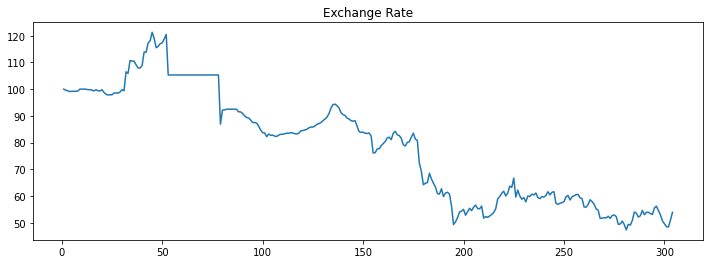

In [221]:
plt.figure(figsize= (12,4))
plt.plot(data['Exchange Rate TWI'])
plt.title("Exchange Rate")

# Simple Moving Average

In [222]:
train_win = 212
test_data = data[train_win:]
train_data = data[:train_win]
mov_wind = 3

In [223]:
y_hat_sma = data.copy()
#y_hat_sma['SMA'] = y_hat_sma['Exchange Rate TWI'][:train_win].rolling(mov_wind).mean()
y_hat_sma['SMA_Forcast'] = y_hat_sma['Exchange Rate TWI'][:train_win].rolling(mov_wind).mean()
y_hat_sma['SMA_Forcast'][train_win:] = y_hat_sma['SMA_Forcast'][train_win - 1]

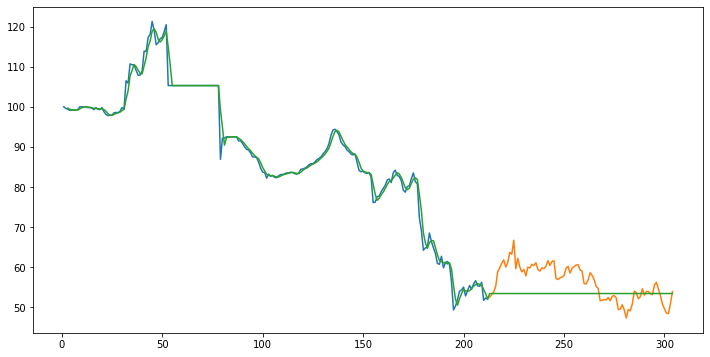

In [224]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Exchange Rate TWI'], label = "Train Data")
plt.plot(test_data['Exchange Rate TWI'], label = "Test Data")
plt.plot(y_hat_sma['SMA_Forcast'], label = "Simple Moving Avarage")
#plt.plot(y_hat_sma['SMA'], label = "Simple Moving Avarage")

plt.show()

# Calculating the MRSE and MAPE

In [225]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Exchange Rate TWI'],y_hat_sma['SMA_Forcast'][train_win:]))
mape = np.round(np.mean(np.abs(test_data['Exchange Rate TWI'] - y_hat_sma['SMA_Forcast'][train_win:] )/test_data['Exchange Rate TWI'])*100,2)

In [226]:
rmse

5.102226709124623

In [227]:
mape

7.32

In [231]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Exchange Rate TWI'])
print("ADF Statistics : %f" % adf_test[0])
print("Critical Value @ 0.05: %.2f" % adf_test[4]['5%'])
print('p-value: %f ' % adf_test[1])

ADF Statistics : -0.805468
Critical Value @ 0.05: -2.87
p-value: 0.817511 


In [232]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Exchange Rate TWI'])
print("ADF Statistics : %f" % kpss_test[0])
print("Critical Value @ 0.05: %.2f" % kpss_test[3]['5%'])
print('p-value: %f ' % kpss_test[1])

ADF Statistics : 1.725897
Critical Value @ 0.05: 0.46
p-value: 0.010000 
